<a href="https://colab.research.google.com/github/fithridewi/fithridewi/blob/main/First_Python_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# importing library & dataset

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_order = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Sample-Superstore%20-%20Orders.csv")
data_order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [138]:
# checking data type

data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [139]:
# copy dataset with new variable
data_order_new = data_order.copy()

# changing Order Date & Ship Date data type into date format
data_order_new[['Order Date', 'Ship Date']] = data_order_new[['Order Date', 'Ship Date']].astype('datetime64[ns]')

data_order_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [140]:
data_order_new.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [141]:
# Check if any null values exist

print(data_order_new.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


# Sales Analysis

In [293]:
# Total Sales

total_sales = data_order_new['Sales'].sum().round(2)
print("Total Sales:", total_sales)

Total Sales: 2297200.86


In [291]:
# Yearly Sales Trend

data_order_new['Year'] = data_order_new['Order Date'].dt.year
yearly_sales = data_order_new.groupby('Year')['Sales'].sum().round(2).reset_index()

yearly_sales

,Year,Sales
0,2014,484247.50
1,2015,470532.51
2,2016,609205.60
3,2017,733215.26


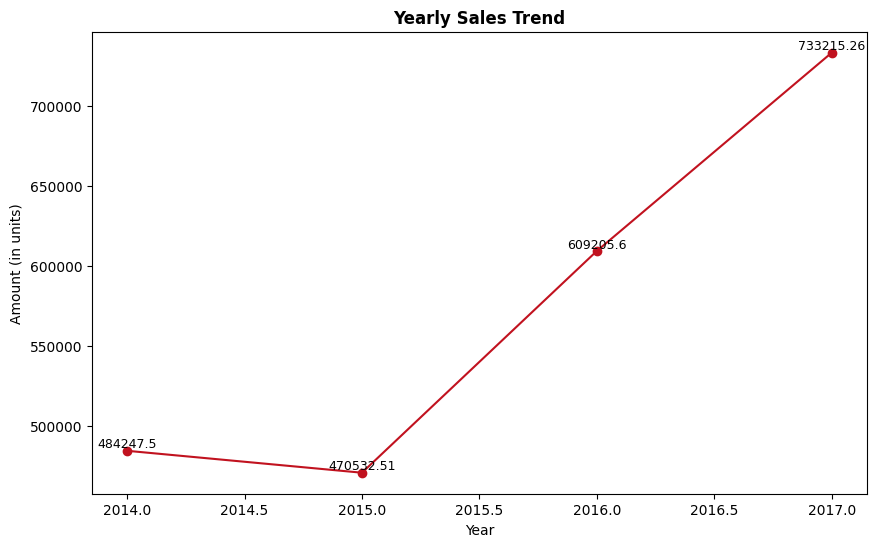

In [292]:
# Visualization

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', label='Sales', color='#c1121f')

for i, value in enumerate(yearly_sales['Sales']):
    plt.text(yearly_sales['Year'][i], value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Yearly Sales Trend', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount (in units)')
plt.show()

In [289]:
# Total Sales per Category

total_sales_per_category = data_order_new.groupby('Category')['Sales'].sum().round(2).reset_index()
total_sales_per_category = total_sales_per_category.sort_values(by='Sales', ascending=False)
total_sales_per_category

,Category,Sales
2,Technology,836154.03
0,Furniture,741999.80
1,Office Supplies,719047.03


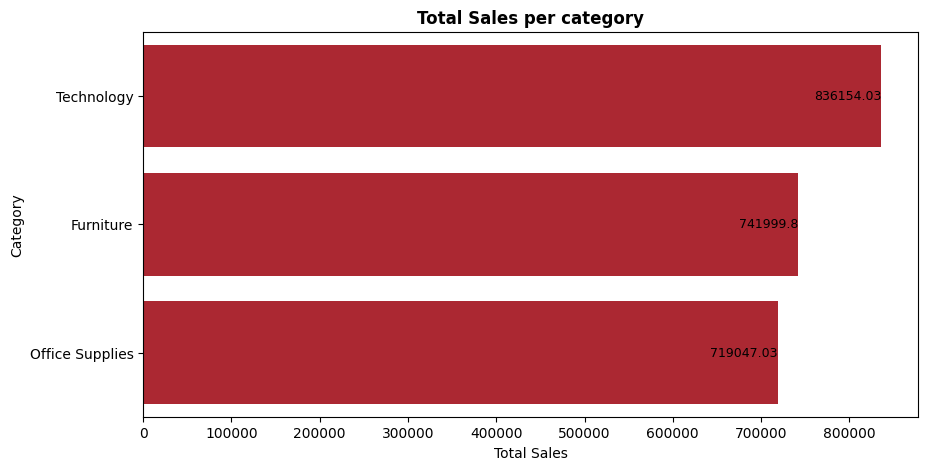

In [290]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Sales', y='Category', data=total_sales_per_category, orient='h', color='#c1121f')
category_count = total_sales_per_category['Sales'].sum()

for idx, value in enumerate(total_sales_per_category['Sales']):
    percent = (value / category_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.title('Total Sales per category', fontweight='bold')
plt.show()

In [287]:
# Technology Sub-Category Sales

technology_data = data_order_new[data_order_new['Category'] == 'Technology']

pivot_technology = technology_data.pivot_table(
    values='Sales',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_technology = pivot_technology.sort_values(by='Sales', ascending=False)

pivot_technology

Sales
Category   Sub-Category           
Technology Phones        330007.05
           Machines      189238.63
           Accessories   167380.32
           Copiers       149528.03

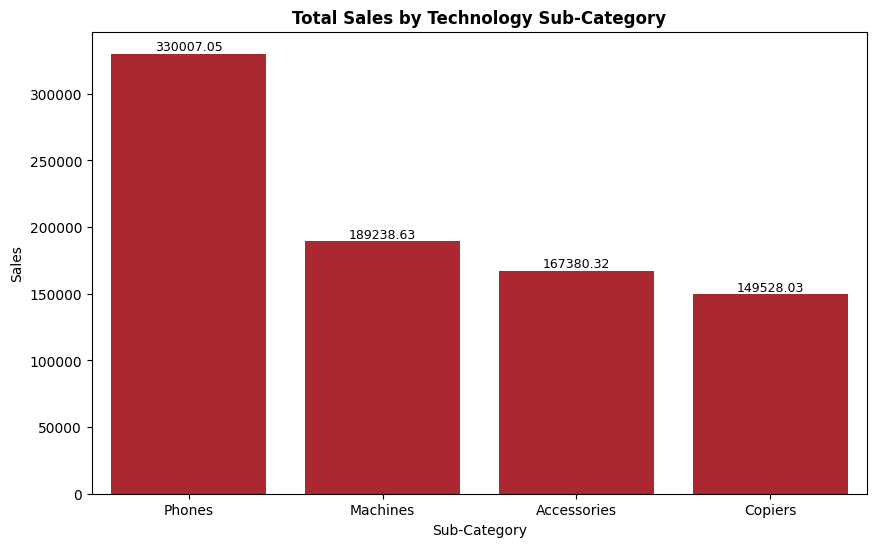

In [288]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_technology.index.get_level_values('Sub-Category'),
            y=pivot_technology['Sales'], color='#c1121f')
technology_count = pivot_technology['Sales'].sum()

for idx, value in enumerate(pivot_technology['Sales']):
    percent = (value / technology_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Sales by Technology Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.show()

In [285]:
# Furniture Sub-Category Sales

furniture_data = data_order_new[data_order_new['Category'] == 'Furniture']

pivot_furniture = furniture_data.pivot_table(
    values='Sales',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_furniture = pivot_furniture.sort_values(by='Sales', ascending=False)

pivot_furniture

Sales
Category  Sub-Category           
Furniture Chairs        328449.10
          Tables        206965.53
          Bookcases     114880.00
          Furnishings    91705.16

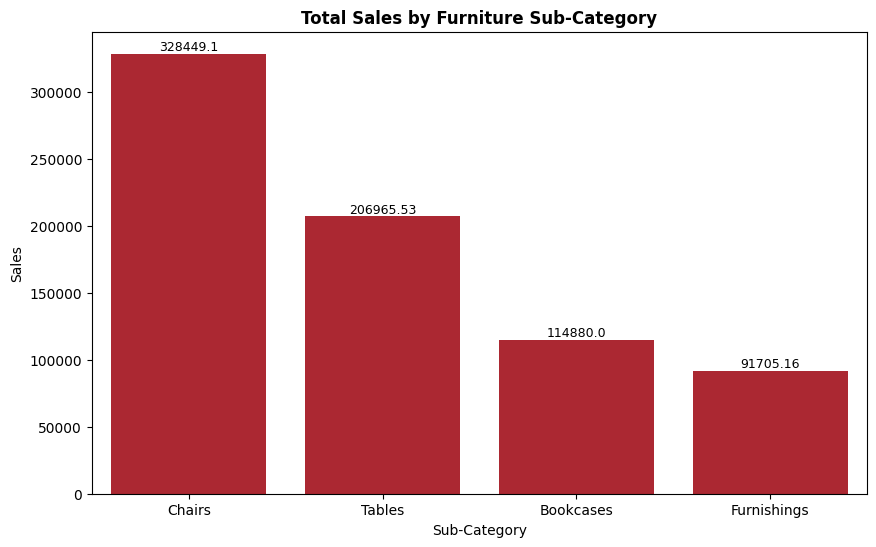

In [286]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_furniture.index.get_level_values('Sub-Category'),
            y=pivot_furniture['Sales'], color='#c1121f')
furniture_count = pivot_furniture['Sales'].sum()

for idx, value in enumerate(pivot_furniture['Sales']):
    percent = (value / furniture_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Sales by Furniture Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.show()

In [283]:
# Office Supplies Sub-Category Sales

office_data = data_order_new[data_order_new['Category'] == 'Office Supplies']

pivot_office = office_data.pivot_table(
    values='Sales',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_office = pivot_office.sort_values(by='Sales', ascending=False)

pivot_office

Sales
Category        Sub-Category           
Office Supplies Storage       223843.61
                Binders       203412.73
                Appliances    107532.16
                Paper          78479.21
                Supplies       46673.54
                Art            27118.79
                Envelopes      16476.40
                Labels         12486.31
                Fasteners       3024.28

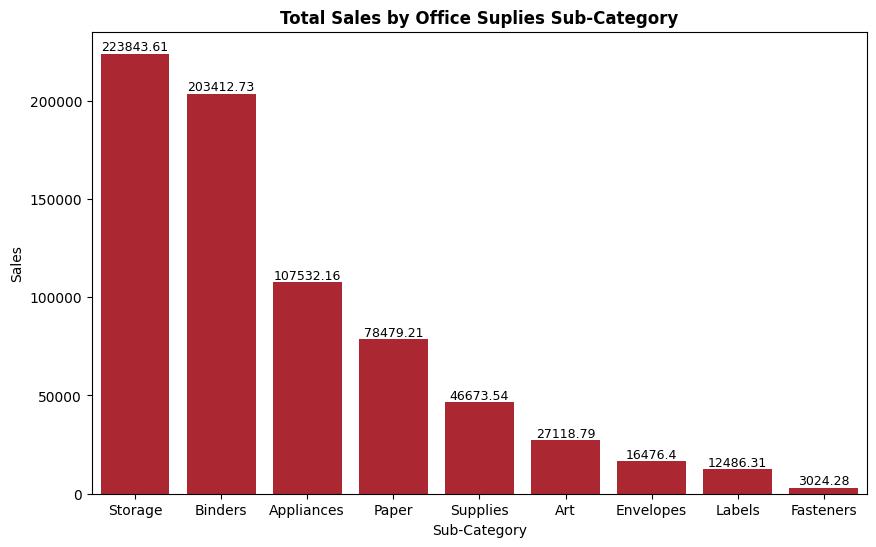

In [284]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_office.index.get_level_values('Sub-Category'),
            y=pivot_office['Sales'], color='#c1121f')
office_count = pivot_office['Sales'].sum()

for idx, value in enumerate(pivot_office['Sales']):
    percent = (value / office_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Sales by Office Suplies Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

plt.show()

In [153]:
# Regional Sales

def pivot_table(data, row, val, agg):
  sales_region = pd.pivot_table(data, index=row, values=val, aggfunc=agg).reset_index()

  return sales_region

In [281]:
sales_region = pd.pivot_table(data_order, index="Region", values="Sales", aggfunc="sum").round(2).reset_index()
sales_region = sales_region.sort_values(by='Sales', ascending=False)

sales_region

,Region,Sales
3,West,725457.82
1,East,678781.24
0,Central,501239.89
2,South,391721.90


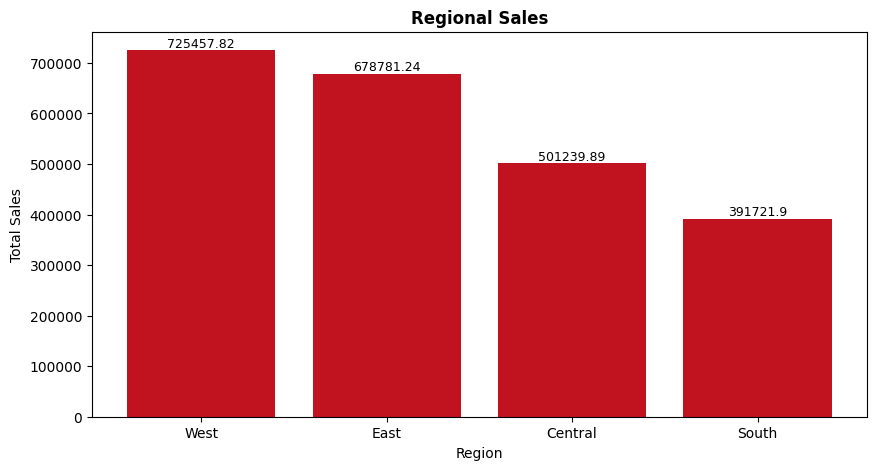

In [282]:
# Visualization

plt.figure(figsize=(10, 5))
plt.bar(sales_region['Region'], sales_region['Sales'], color='#c1121f')
total_count = sales_region['Sales'].sum()

for idx, value in enumerate(sales_region['Sales']):
    percent = (value / total_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Regional Sales', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [280]:
# Discount Impact on Sales

discount_analysis = data_order_new.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).round(2).reset_index()
discount_analysis = discount_analysis.sort_values(by='Discount', ascending=False)
discount_analysis

,Discount,Sales,Profit
11,0.80,16963.76,-30539.04
10,0.70,40620.28,-40075.36
9,0.60,6644.70,-5944.66
8,0.50,58918.54,-20506.43
7,0.45,5484.97,-2493.11
6,0.40,116417.78,-23057.05
5,0.32,14493.46,-2391.14
4,0.30,103226.66,-10369.28
3,0.20,764594.37,90337.31
2,0.15,27558.52,1418.99


<ipython-input-157-5b9d416b8b9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Sales', data=discount_analysis, palette='coolwarm')


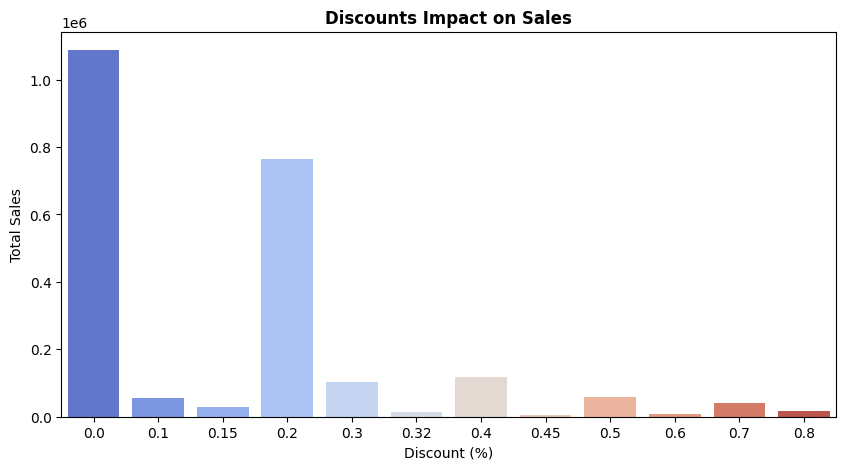

In [157]:
# Visualization

plt.figure(figsize=(10, 5))
sns.barplot(x='Discount', y='Sales', data=discount_analysis, palette='coolwarm')

plt.title('Discounts Impact on Sales', fontweight='bold')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales')

plt.show()

In [158]:
# Correlation Between Discount and Sales

correlation = discount_analysis[['Discount', 'Sales']].corr().iloc[0,1]
print(f'Correlation Between Discount and Sales: {correlation:.2f}')

Correlation Between Discount and Sales: -0.57


# Profit Analysis

In [294]:
# Total Profit

total_profit = data_order_new['Profit'].sum().round(2)
print("Total Profit:", total_profit)

Total Profit: 286397.02


In [278]:
# Yearly Profit Trend

data_order_new['Year'] = data_order_new['Order Date'].dt.year
yearly_profit = data_order_new.groupby('Year')['Profit'].sum().round(2).reset_index()

yearly_profit

,Year,Profit
0,2014,49543.97
1,2015,61618.60
2,2016,81795.17
3,2017,93439.27


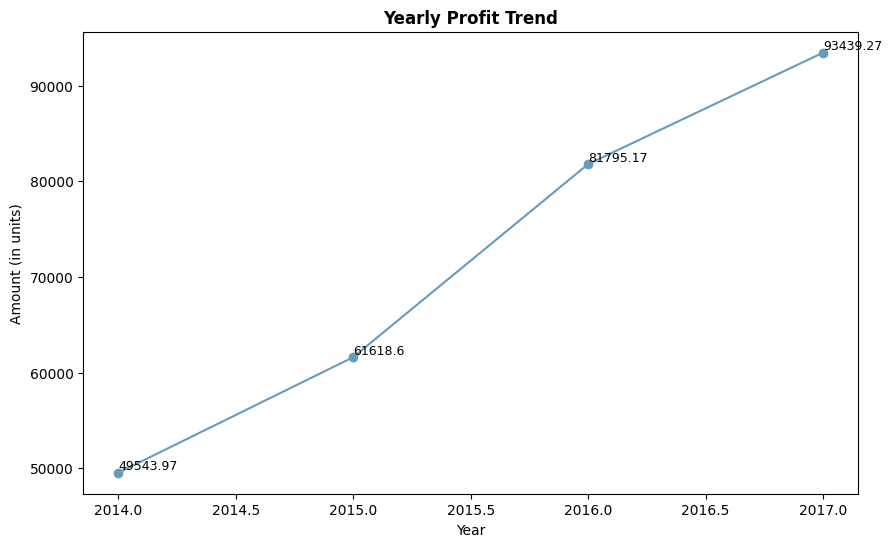

In [279]:
# Visualization

plt.figure(figsize=(10, 6))
plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', linestyle='-', label='Profit', color='#669bbc')

for i, value in enumerate(yearly_profit['Profit']):
    plt.text(yearly_profit['Year'][i], value, f'{value}', ha='left', va='bottom', fontsize=9)

plt.title('Yearly Profit Trend', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount (in units)')
plt.show()

In [276]:
# Total Profit per Category

total_profit_per_category = data_order_new.groupby('Category')['Profit'].sum().round(2).reset_index()
total_profit_per_category = total_profit_per_category.sort_values(by='Profit', ascending=False)
total_profit_per_category

,Category,Profit
2,Technology,145454.95
1,Office Supplies,122490.80
0,Furniture,18451.27


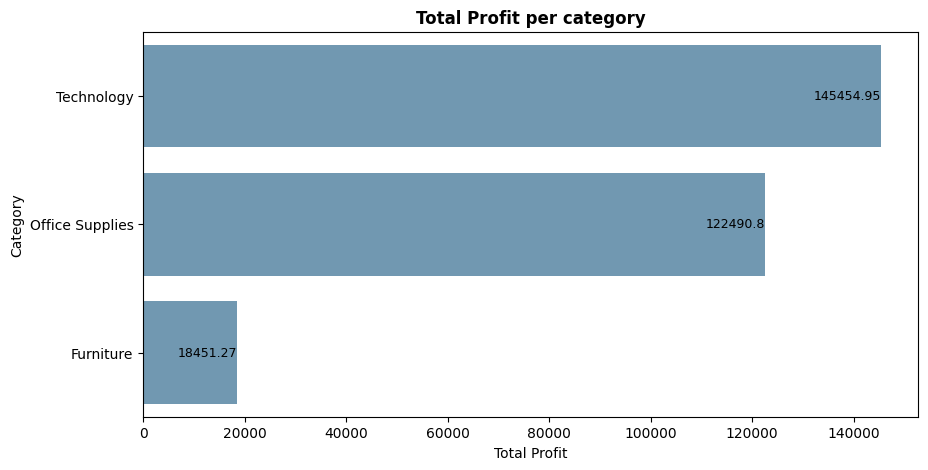

In [277]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Profit', y='Category', data=total_profit_per_category, orient='h', color='#669bbc')
profit_category_count = total_profit_per_category['Profit'].sum()

for idx, value in enumerate(total_profit_per_category['Profit']):
    percent = (value / profit_category_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.title('Total Profit per category', fontweight='bold')
plt.show()

In [274]:
# Technology Sub-Category Profit

technology_profit = data_order_new[data_order_new['Category'] == 'Technology']

pivot_technology_profit = technology_profit.pivot_table(
    values='Profit',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_technology_profit = pivot_technology_profit.sort_values(by='Profit', ascending=False)

pivot_technology_profit

Profit
Category   Sub-Category          
Technology Copiers       55617.82
           Phones        44515.73
           Accessories   41936.64
           Machines       3384.76

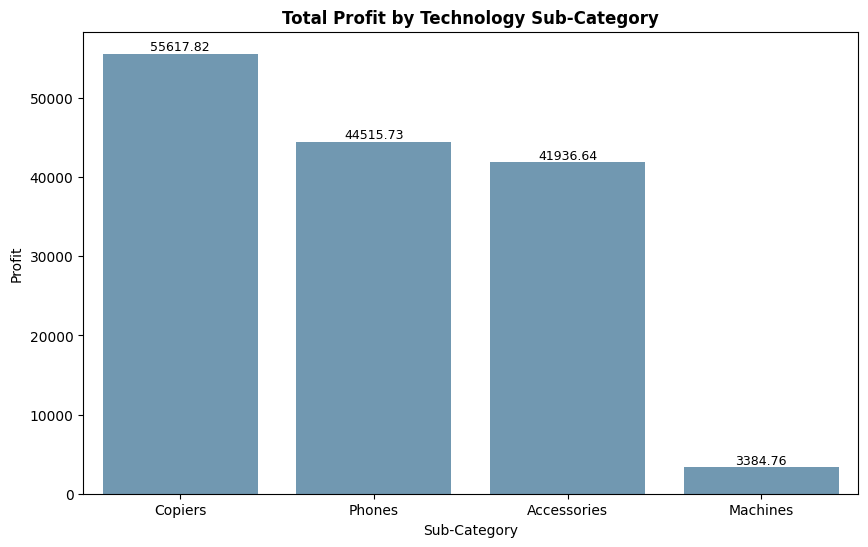

In [275]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_technology_profit.index.get_level_values('Sub-Category'),
            y=pivot_technology_profit['Profit'], color='#669bbc')
technology_profit_count = pivot_technology_profit['Profit'].sum()

for idx, value in enumerate(pivot_technology_profit['Profit']):
    percent = (value / technology_profit_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Profit by Technology Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

plt.show()

In [272]:
# Furniture Sub-Category Profit

furniture_profit = data_order_new[data_order_new['Category'] == 'Furniture']

pivot_furniture_profit = furniture_profit.pivot_table(
    values='Profit',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_furniture_profit = pivot_furniture_profit.sort_values(by='Profit', ascending=False)

pivot_furniture_profit

Profit
Category  Sub-Category          
Furniture Chairs        26590.17
          Furnishings   13059.14
          Bookcases     -3472.56
          Tables       -17725.48

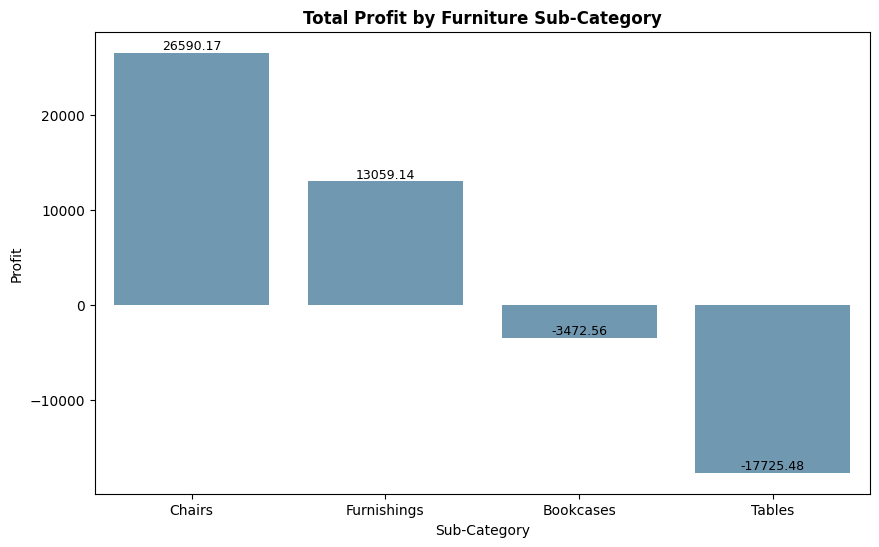

In [273]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_furniture_profit.index.get_level_values('Sub-Category'),
            y=pivot_furniture_profit['Profit'], color='#669bbc')
furniture_profit_count = pivot_furniture_profit['Profit'].sum()

for idx, value in enumerate(pivot_furniture_profit['Profit']):
    percent = (value / furniture_profit_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Profit by Furniture Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

plt.show()

In [270]:
# Office Supplies Sub-Category Profit

office_profit = data_order_new[data_order_new['Category'] == 'Office Supplies']

pivot_office_profit = office_profit.pivot_table(
    values='Profit',
    index=['Category', 'Sub-Category'],
    aggfunc='sum',
    fill_value=0
).round(2)
pivot_office_profit = pivot_office_profit.sort_values(by='Profit', ascending=False)

pivot_office_profit

Profit
Category        Sub-Category          
Office Supplies Paper         34053.57
                Binders       30221.76
                Storage       21278.83
                Appliances    18138.01
                Envelopes      6964.18
                Art            6527.79
                Labels         5546.25
                Fasteners       949.52
                Supplies      -1189.10

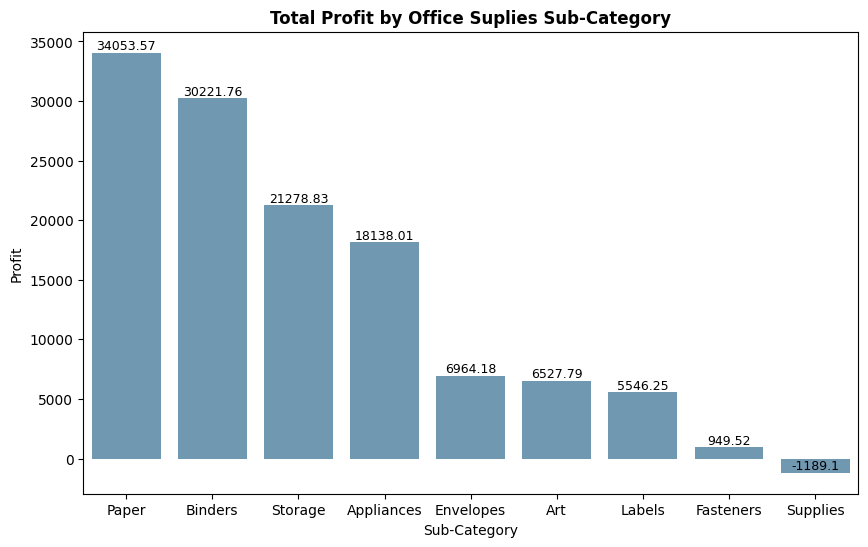

In [271]:
# Visualization

plt.figure(figsize=(10,6))
sns.barplot(x=pivot_office_profit.index.get_level_values('Sub-Category'),
            y=pivot_office_profit['Profit'], color='#669bbc')
office_profit_count = pivot_office_profit['Profit'].sum()

for idx, value in enumerate(pivot_office_profit['Profit']):
    percent = (value / office_profit_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Profit by Office Suplies Sub-Category', fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')

plt.show()

In [171]:
# Regional Profit

def pivot_table(data, row, val, agg):
  profit_region = pd.pivot_table(data, index=row, values=val, aggfunc=agg).reset_index()

  return profit_region

In [268]:
profit_region = pd.pivot_table(data_order, index="Region", values="Profit", aggfunc="sum").round(2).reset_index()
profit_region = profit_region.sort_values(by='Profit', ascending=False)

profit_region

,Region,Profit
3,West,108418.45
1,East,91522.78
2,South,46749.43
0,Central,39706.36


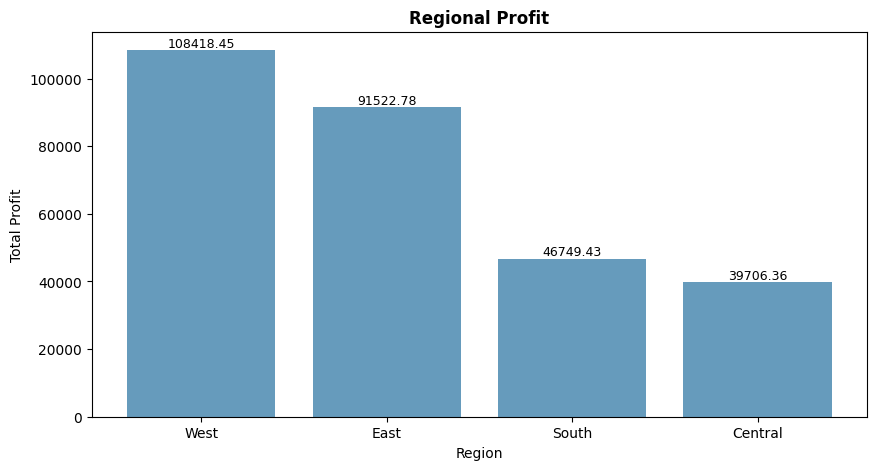

In [269]:
# Visualization

plt.figure(figsize=(10, 5))
plt.bar(profit_region['Region'], profit_region['Profit'], color='#669bbc')
profit_count = profit_region['Profit'].sum()

for idx, value in enumerate(profit_region['Profit']):
    percent = (value / profit_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Regional Profit', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

In [174]:
# Margin Profit Margin Trend

data_order_new['Profit Margin'] = data_order_new['Profit'] / data_order_new['Sales']
data_order_new['Year'] = data_order_new['Order Date'].dt.year
yearly_margin = data_order_new.groupby('Year')['Profit Margin'].mean()

yearly_margin

,Profit Margin
Year,
2014,0.118112
2015,0.117567
2016,0.129789
2017,0.115981


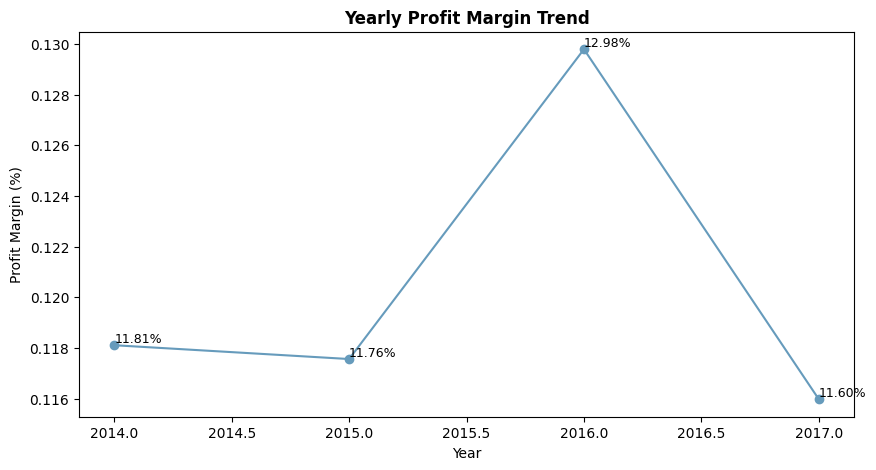

In [175]:
# Visualization

plt.figure(figsize=(10, 5))
plt.plot(yearly_margin.index, yearly_margin.values, marker='o', linestyle='-', color='#669bbc')

for i, value in enumerate(yearly_margin):
    plt.text(yearly_margin.index[i], value, f'{value:.2%}', ha='left', va='bottom', fontsize=9)

plt.xlabel('Year')
plt.ylabel('Profit Margin (%)')
plt.title('Yearly Profit Margin Trend', fontweight='bold')

plt.show()

In [266]:
# Discount Impact on Profit

discount_analysis = data_order_new.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).round(2).reset_index()
discount_analysis = discount_analysis.sort_values(by='Discount', ascending=False)
discount_analysis

,Discount,Sales,Profit
11,0.80,16963.76,-30539.04
10,0.70,40620.28,-40075.36
9,0.60,6644.70,-5944.66
8,0.50,58918.54,-20506.43
7,0.45,5484.97,-2493.11
6,0.40,116417.78,-23057.05
5,0.32,14493.46,-2391.14
4,0.30,103226.66,-10369.28
3,0.20,764594.37,90337.31
2,0.15,27558.52,1418.99


<ipython-input-267-32af24df57b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Profit', data=discount_analysis, palette='coolwarm')


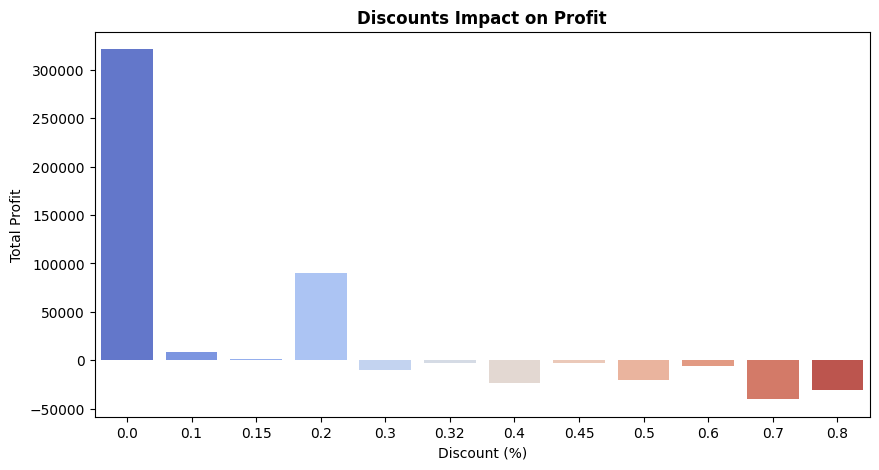

In [267]:
# Visualization

plt.figure(figsize=(10, 5))
sns.barplot(x='Discount', y='Profit', data=discount_analysis, palette='coolwarm')

plt.title('Discounts Impact on Profit', fontweight='bold')
plt.xlabel('Discount (%)')
plt.ylabel('Total Profit')

plt.show()

In [178]:
# Correlation Between Discount and Profit

correlation = discount_analysis[['Discount', 'Profit']].corr().iloc[0,1]
print(f'Correlation Between Discount and Profit: {correlation:.2f}')

Correlation Between Discount and Profit: -0.63


# Customer Analysis

In [218]:
# Customer Segmentation

customer_segmentation = data_order_new.groupby([data_order_new['Order Date'].dt.year, 'Segment']).size().reset_index(name='Transactions')
customer_segmentation.columns = ['Year', 'Segment', 'Transactions']
customer_segmentation

,Year,Segment,Transactions
0,2014,Consumer,1070
1,2014,Corporate,611
2,2014,Home Office,312
3,2015,Consumer,1125
4,2015,Corporate,636
5,2015,Home Office,341
6,2016,Consumer,1328
7,2016,Corporate,793
8,2016,Home Office,466
9,2017,Consumer,1668


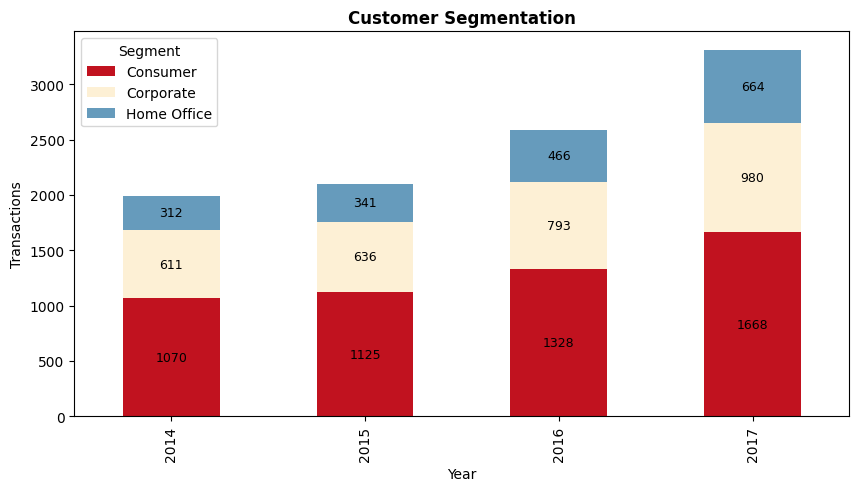

In [302]:
# Visualization

fig, ax = plt.subplots(figsize=(10, 5))

grafik_stack = pd.pivot_table(customer_segmentation, index='Year', columns='Segment', values='Transactions', aggfunc='sum')
colors = ["#c1121f", "#fdf0d5", "#669bbc"]
grafik_stack.plot(kind='bar', stacked=True, ax=ax, color=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9)

plt.title('Customer Segmentation', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Transactions')

plt.show()

In [264]:
# Top 10 Customers by Total Sales

top_sales_customers = data_order_new.groupby('Customer Name')['Sales'].sum().round(2).reset_index()
top_sales_customers = top_sales_customers.sort_values(by='Sales', ascending=False).head(10)

top_sales_customers

,Customer Name,Sales
686,Sean Miller,25043.05
730,Tamara Chand,19052.22
622,Raymond Buch,15117.34
757,Tom Ashbrook,14595.62
6,Adrian Barton,14473.57
441,Ken Lonsdale,14175.23
671,Sanjit Chand,14142.33
334,Hunter Lopez,12873.30
672,Sanjit Engle,12209.44
156,Christopher Conant,12129.07


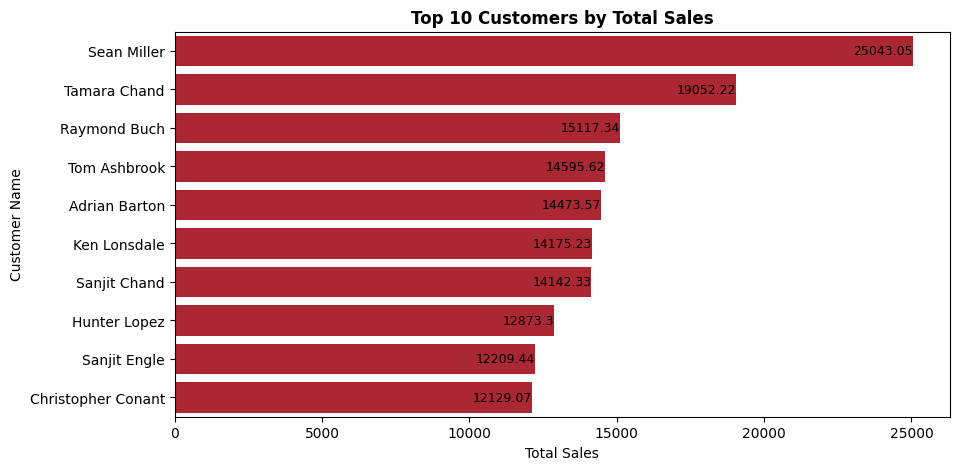

In [313]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Sales', y='Customer Name', data=top_sales_customers, orient='h', color='#c1121f')
top_sales_customers_count = top_sales_customers['Sales'].sum()

for idx, value in enumerate(top_sales_customers['Sales']):
    percent = (value / top_sales_customers_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Sales', fontweight='bold')
plt.show()

In [259]:
# Top 10 Customers by Total Profit

top_profit_customers = data_order_new.groupby('Customer Name')['Profit'].sum().round(2).reset_index()
top_profit_customers = top_profit_customers.sort_values(by='Profit', ascending=False).head(10)

top_profit_customers

,Customer Name,Profit
730,Tamara Chand,8981.32
622,Raymond Buch,6976.10
671,Sanjit Chand,5757.41
334,Hunter Lopez,5622.43
6,Adrian Barton,5444.81
757,Tom Ashbrook,4703.79
157,Christopher Martinez,3899.89
431,Keith Dawkins,3038.63
35,Andy Reiter,2884.62
194,Daniel Raglin,2869.08


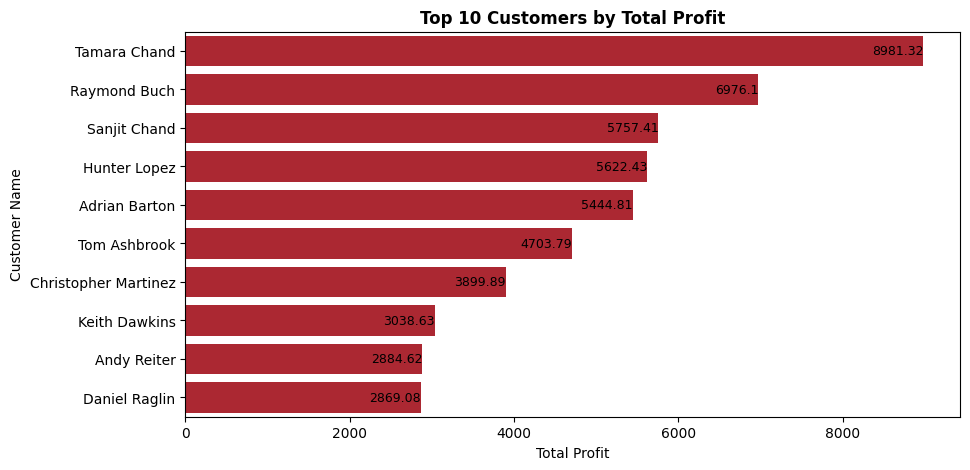

In [311]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Profit', y='Customer Name', data=top_profit_customers, orient='h', color='#c1121f')
top_profit_customers_count = top_profit_customers['Profit'].sum()

for idx, value in enumerate(top_profit_customers['Profit']):
    percent = (value / top_profit_customers_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Profit')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Profit', fontweight='bold')
plt.show()

In [184]:
# New vs. Returning Customers

first_order = data_order_new.groupby('Customer ID')['Order Date'].min().reset_index()
first_order.columns = ['Customer ID', 'First Order Date']
data_order_new = data_order_new.merge(first_order, on='Customer ID', how='left')
data_order_new['Customer Type'] = data_order_new.apply(lambda x: 'New' if x['Order Date'] == x['First Order Date'] else 'Returning', axis=1)
customer_counts = data_order_new['Customer Type'].value_counts()

print(customer_counts)

Customer Type
Returning    8347
New          1647
Name: count, dtype: int64


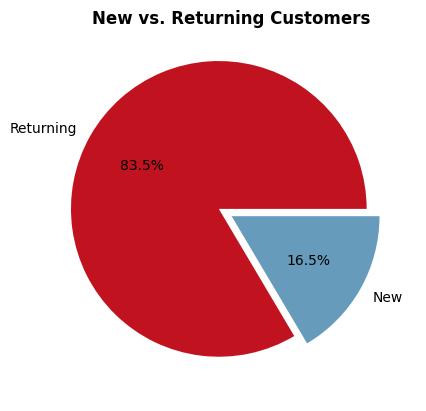

In [309]:
# Visualization

explodes = [0.1, 0]
customer_counts.plot(kind='pie', autopct='%1.1f%%', explode=explodes, colors=['#c1121f', '#669bbc'])
plt.ylabel('')
plt.title('New vs. Returning Customers', fontweight='bold')
plt.show()

# Shipping Analysis

In [256]:
# Average Shipping Duration and Best Shipping Mode

data_order_new['Shipping Duration'] = (data_order_new['Ship Date'] - data_order_new['Order Date']).dt.days
ship_mode_summary = data_order_new.groupby('Ship Mode').agg(
    Total_Orders=('Order ID', 'count'),
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Shipping_Days=('Shipping Duration', 'mean')
).round(2).reset_index()
ship_mode_summary = ship_mode_summary.sort_values(by='Total_Orders', ascending=False)

ship_mode_summary

,Ship Mode,Total_Orders,Total_Sales,Total_Profit,Avg_Shipping_Days
3,Standard Class,5968,1358215.74,164088.79,5.01
2,Second Class,1945,459193.57,57446.64,3.24
0,First Class,1538,351428.42,48969.84,2.18
1,Same Day,543,128363.12,15891.76,0.04


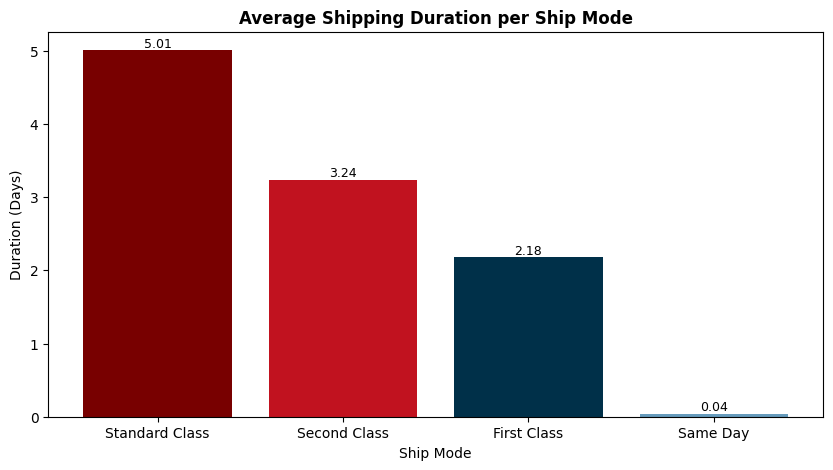

In [305]:
# Average Shipping Duration Visualization

plt.figure(figsize=(10, 5))
plt.bar(ship_mode_summary['Ship Mode'], ship_mode_summary['Avg_Shipping_Days'], color=['#780000', '#c1121f', '#003049', '#669bbc'])
shipping_count = ship_mode_summary['Avg_Shipping_Days'].sum()

for idx, value in enumerate(ship_mode_summary['Avg_Shipping_Days']):
    percent = (value / shipping_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Ship Mode')
plt.ylabel('Duration (Days)')
plt.title('Average Shipping Duration per Ship Mode', fontweight='bold')

plt.show()

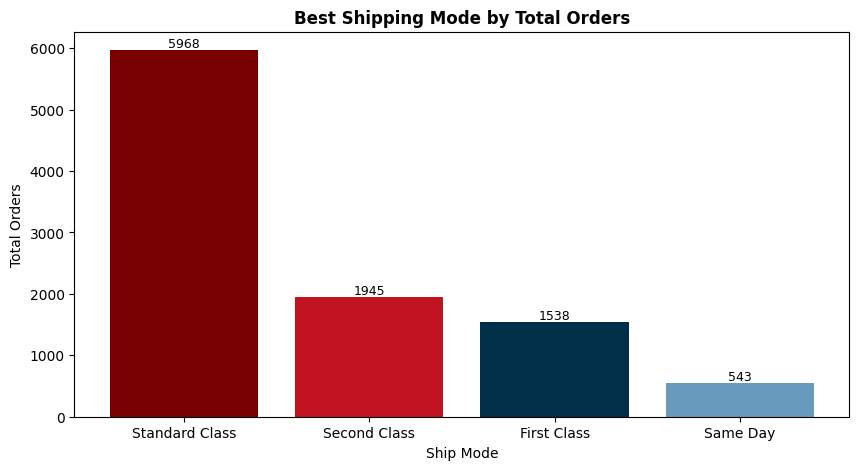

In [258]:
# Best Shipping Mode Visualization

plt.figure(figsize=(10, 5))
plt.bar(ship_mode_summary['Ship Mode'], ship_mode_summary['Total_Orders'], color=['#780000', '#c1121f', '#003049', '#669bbc'])
shipping_count = ship_mode_summary['Total_Orders'].sum()

for idx, value in enumerate(ship_mode_summary['Total_Orders']):
    percent = (value / shipping_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)
plt.xlabel('Ship Mode')
plt.ylabel('Total Orders')
plt.title('Best Shipping Mode by Total Orders', fontweight='bold')
plt.show()

# Geospital Analysis

In [188]:
# Performa Penjualan berdasarkan Kota/Negara Bagian: Menggunakan heatmap untuk melihat daerah dengan penjualan tertinggi.

In [189]:
# Profit Berdasarkan Lokasi: Mengidentifikasi daerah yang memiliki keuntungan tinggi atau rendah.

# Product Analysis

In [314]:
# Top 10 Products by Total Sales

total_sales_per_product = data_order_new.groupby('Product ID')['Sales'].sum().round(2).reset_index()
total_sales_per_product = total_sales_per_product.sort_values(by='Sales', ascending=False).head(10)

total_sales_per_product

,Product ID,Sales
1614,TEC-CO-10004722,61599.82
776,OFF-BI-10003527,27453.38
1642,TEC-MA-10002412,22638.48
80,FUR-CH-10002024,21870.58
691,OFF-BI-10001359,19823.48
657,OFF-BI-10000545,19024.50
1604,TEC-CO-10001449,18839.69
1631,TEC-MA-10001127,18374.90
845,OFF-BI-10004995,17965.07
1420,OFF-SU-10000151,17030.31


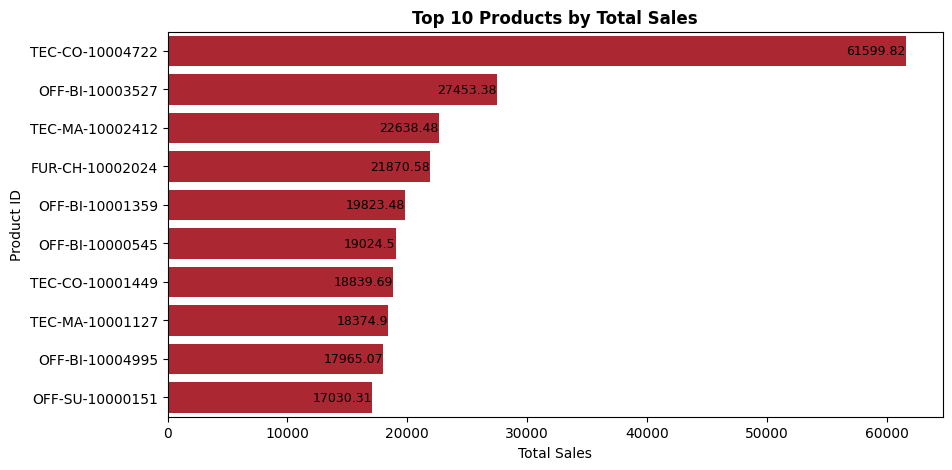

In [326]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Sales', y='Product ID', data=total_sales_per_product, orient='h', color='#c1121f')
product_count = total_sales_per_product['Sales'].sum()

for idx, value in enumerate(total_sales_per_product['Sales']):
    percent = (value / product_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Sales')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Total Sales', fontweight='bold')
plt.show()

In [318]:
# Top 10 Products by Total Profit

total_profit_per_product = data_order_new.groupby('Product ID')['Profit'].sum().round(2).reset_index()
total_profit_per_product = total_profit_per_product.sort_values(by='Profit', ascending=False).head(10)

total_profit_per_product

,Product ID,Profit
1614,TEC-CO-10004722,25199.93
776,OFF-BI-10003527,7753.04
1604,TEC-CO-10001449,6983.88
1611,TEC-CO-10003763,4570.93
1517,TEC-AC-10002049,4425.34
1631,TEC-MA-10001127,4094.98
1666,TEC-MA-10003979,3772.95
1630,TEC-MA-10001047,3717.97
682,OFF-BI-10001120,3345.28
1617,TEC-MA-10000045,3343.54


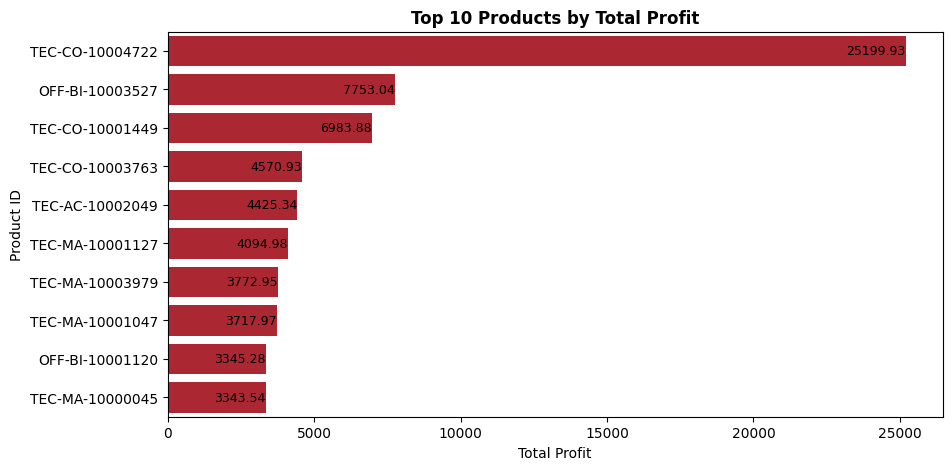

In [324]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Profit', y='Product ID', data=total_profit_per_product, orient='h', color='#c1121f')
product_profit_count = total_profit_per_product['Profit'].sum()

for idx, value in enumerate(total_profit_per_product['Profit']):
    percent = (value / product_profit_count) * 100
    plt.text(value, idx, f'{value}', ha='right', va='center', fontsize=9)

plt.xlabel('Total Profit')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Total Profit', fontweight='bold')
plt.show()

# -------------------------------- BATAS SUCI ----------------------------------

In [193]:
def pivot_table(data, row, val, agg):
  sales_category = pd.pivot_table(data, index=row, values=val, aggfunc=agg).reset_index()

  return sales_category

In [194]:
# pivoting table for bar chart
sales_category = pd.pivot_table(data_order, index="Category", values="Sales", aggfunc="sum").reset_index()

# sorting values
sales_category = sales_category.sort_values(by='Sales', ascending=True)

sales_category

,Category,Sales
1,Office Supplies,719047.0320
0,Furniture,741999.7953
2,Technology,836154.0330


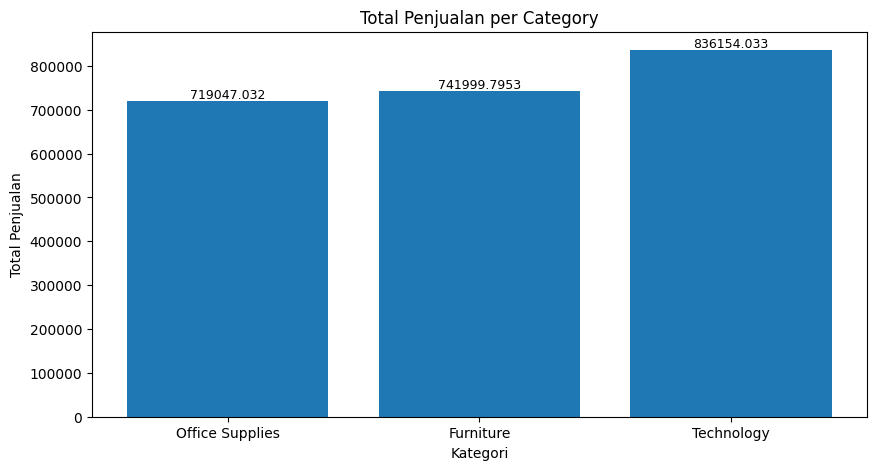

In [195]:
# grafik bar chart

# atur dulu frame lebar x tinggi
plt.figure(figsize=(10, 5))

# struktur grafik
plt.bar(sales_category['Category'], sales_category['Sales'])


# Add data labels
total_count = sales_category['Sales'].sum()

for idx, value in enumerate(sales_category['Sales']):
    percent = (value / total_count) * 100
    # plt.text(idx, value, f'{value}\n({percent:.2f}%)', ha='center', va='bottom', fontsize=9)
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

# tambahan elemen
plt.title('Total Penjualan per Category')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.show()

In [196]:
# struktur data for pie chart
structur_pie = pivot_table(data=data_order, row='Ship Mode', val='Quantity', agg='sum')

# sorting quantity
structur_pie = structur_pie.sort_values(by='Quantity', ascending=False)

structur_pie

,Ship Mode,Quantity
3,Standard Class,22797
2,Second Class,7423
0,First Class,5693
1,Same Day,1960


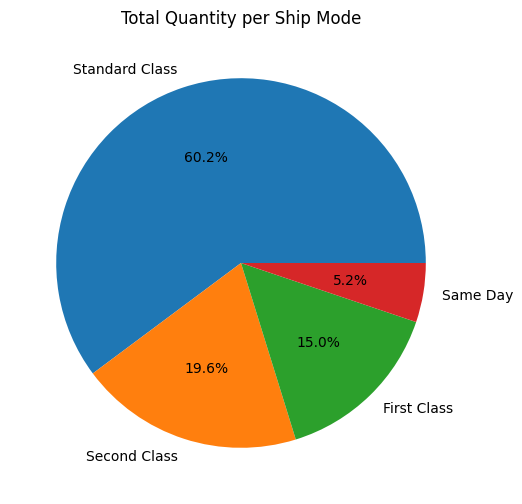

In [197]:
# grafik pie chart

# atur dulu frame lebar x tinggi
plt.figure(figsize=(7, 6))

# struktur grafik
plt.pie(structur_pie['Quantity'], labels=structur_pie['Ship Mode'], autopct='%1.1f%%')

# tambahan elemen
plt.title('Total Quantity per Ship Mode')
plt.show()

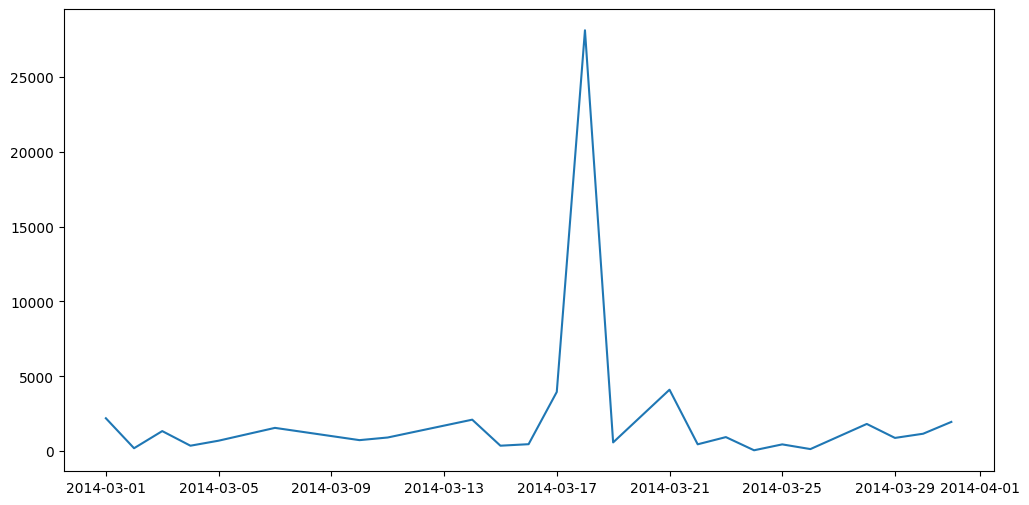

In [198]:
# filtering data only March 2014
march_2024 = data_order_new[(data_order_new['Order Date'] >= '2014-03-01') & (data_order_new['Order Date'] <= '2014-03-31')]

# pivot table sales per hari di bulan Maret 2024
structure_line = pivot_table(data=march_2024, row='Order Date', val='Sales', agg='sum')

# atur dulu frame lebar x tinggi
plt.figure(figsize=(12, 6))

# grafik line chart
plt.plot(structure_line['Order Date'], structure_line['Sales'])

plt.show()

<ipython-input-199-f407b05b371a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_2024_1_5['Order Date'] = march_2024_1_5['Order Date'].dt.strftime('%d-%m-%Y')


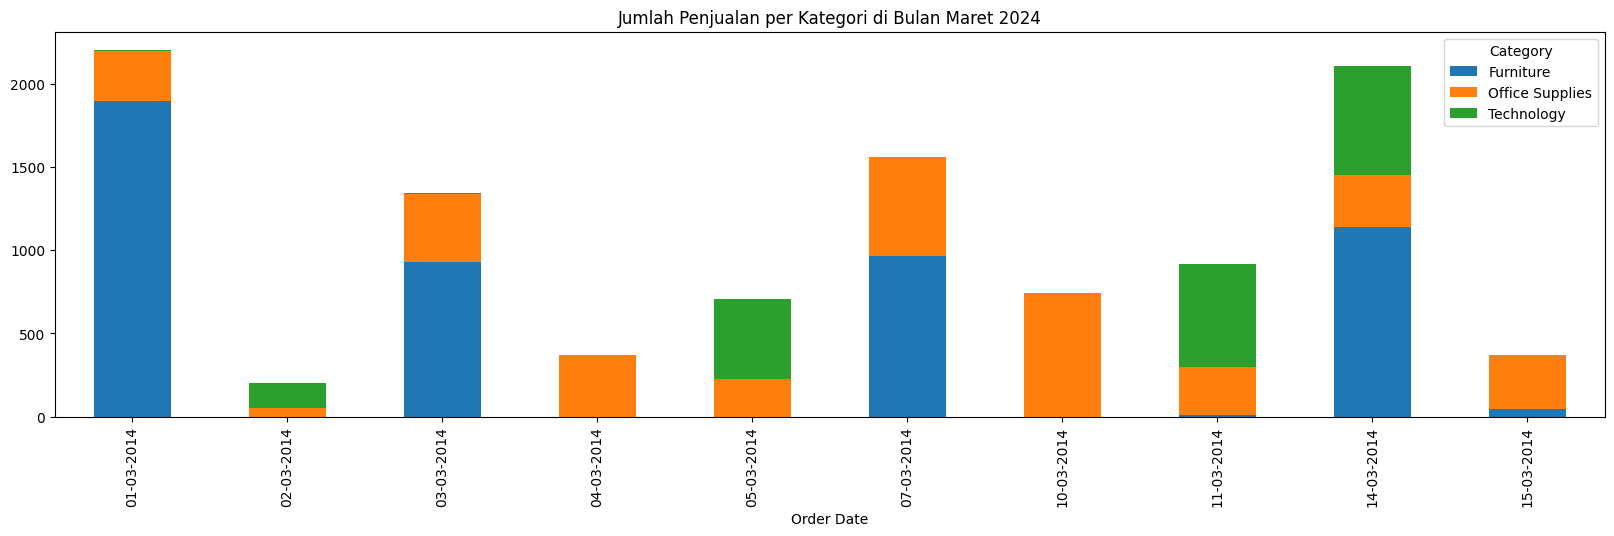

In [199]:
# filtering data only March 2014
march_2024_1_5 = data_order_new[(data_order_new['Order Date'] >= '2014-03-01') & (data_order_new['Order Date'] <= '2014-03-15')]

# get the date only
march_2024_1_5['Order Date'] = march_2024_1_5['Order Date'].dt.strftime('%d-%m-%Y')

# stacked bar chart untuk menampilkan jumlah penjualan per kategori di bulan 2024 secara harian

# atur dulu frame lebar x tinggi
fig, ax = plt.subplots(figsize=(20, 5))

# pivot table
grafik_stack = pd.pivot_table(march_2024_1_5, index='Order Date', columns='Category', values='Sales', aggfunc='sum')

grafik_stack.plot(kind='bar', stacked=True, ax=ax)

plt.title('Jumlah Penjualan per Kategori di Bulan Maret 2024')

plt.show()

In [200]:
grafik_stack

Category,Furniture,Office Supplies,Technology
Order Date,,,
01-03-2014,1893.995,303.216,5.94
02-03-2014,NaN,51.184,151.20
03-03-2014,928.802,407.100,9.99
04-03-2014,NaN,370.452,NaN
05-03-2014,NaN,225.592,479.97
07-03-2014,966.984,594.078,NaN
10-03-2014,NaN,741.956,NaN
11-03-2014,8.320,289.064,620.93
14-03-2014,1139.920,310.920,657.71


# ---------- Mini Project Started ----------

## 1. Analyze the Furniture Sales distribution.

## 2. Analyze the total Sales in each region.

## 3. Analyze the relationship between profit and sales.

In [201]:
# Analysis

summary = data_order_new[['Sales', 'Profit']].describe()
correlation = data_order_new[['Sales', 'Profit']].corr()

print("Summary Statistics:\n", summary)
print("\nCorrelation Between Sales and Profit:\n", correlation)

Summary Statistics:
               Sales       Profit
count   9994.000000  9994.000000
mean     229.858001    28.656896
std      623.245101   234.260108
min        0.444000 -6599.978000
25%       17.280000     1.728750
50%       54.490000     8.666500
75%      209.940000    29.364000
max    22638.480000  8399.976000

Correlation Between Sales and Profit:
            Sales    Profit
Sales   1.000000  0.479064
Profit  0.479064  1.000000


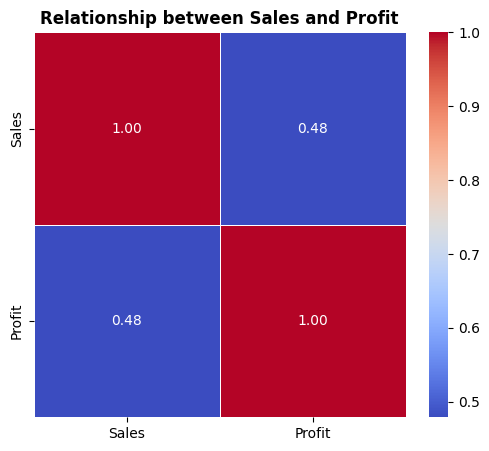

In [202]:
# Visualization

plt.figure(figsize=(6,5))
sns.heatmap(data_order_new[['Sales', 'Profit']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Relationship between Sales and Profit', fontweight='bold')
plt.show()

## 4. Analyze the profitability of orders in each ship mode.

In [203]:
# Analysis

grouping = data_order.groupby('Ship Mode').agg(
    total_orders=('Order ID', 'count'),
    total_profit=('Profit', 'sum')
).reset_index()

profitability = grouping.sort_values(by='total_profit', ascending=False)

profitability

,Ship Mode,total_orders,total_profit
3,Standard Class,5968,164088.7875
2,Second Class,1945,57446.6354
0,First Class,1538,48969.8399
1,Same Day,543,15891.7589


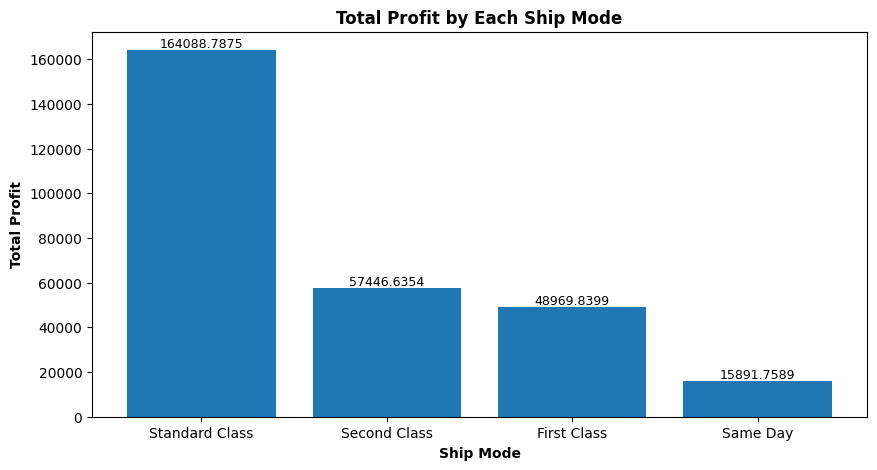

In [204]:
# Visualization

plt.figure(figsize=(10, 5))
plt.bar(profitability['Ship Mode'], profitability['total_profit'])
total_count = profitability['total_profit'].sum()

for idx, value in enumerate(profitability['total_profit']):
    percent = (value / total_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('Total Profit by Each Ship Mode', fontweight='bold')
plt.xlabel('Ship Mode', fontweight='bold')
plt.ylabel('Total Profit', fontweight='bold')
plt.show()

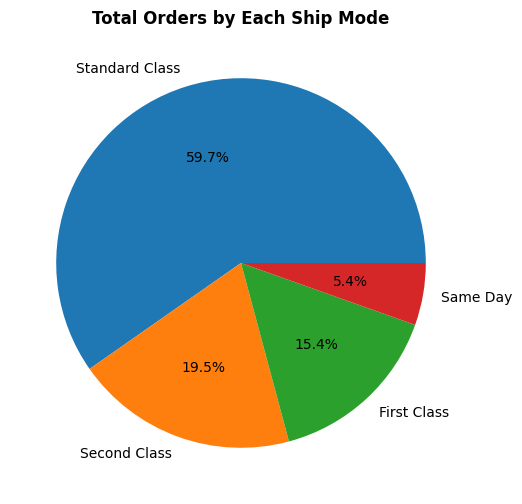

In [205]:
# Visualization

plt.figure(figsize=(7, 6))
plt.pie(profitability['total_orders'], labels=profitability['Ship Mode'], autopct='%1.1f%%')

plt.title('Total Orders by Each Ship Mode', fontweight='bold')
plt.show()

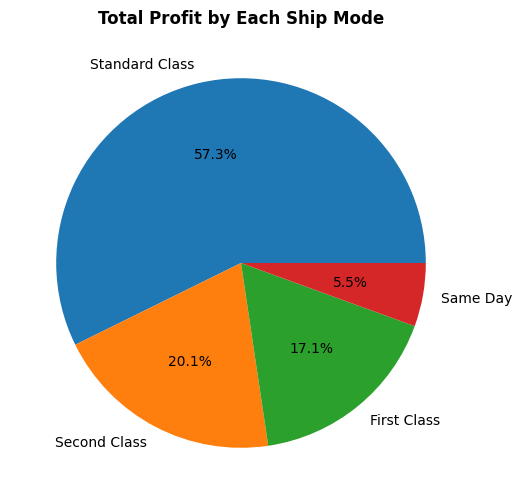

In [206]:
# Visualization

plt.figure(figsize=(7, 6))
plt.pie(profitability['total_profit'], labels=profitability['Ship Mode'], autopct='%1.1f%%')

plt.title('Total Profit by Each Ship Mode', fontweight='bold')
plt.show()

## 5. Analyze the trend of sales and profit on March 2014.

In [207]:
# Analysis

march_2014_data = data_order_new[(data_order_new['Order Date'].dt.year == 2014) & (data_order_new['Order Date'].dt.month == 3)]
grouped_march_2014 = march_2014_data.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

grouped_march_2014

,Order Date,Sales,Profit
0,2014-03-01,2203.151,-208.9614
1,2014-03-02,202.384,56.0112
2,2014-03-03,1345.892,-629.7989
3,2014-03-04,370.452,20.0778
4,2014-03-05,705.562,261.1901
5,2014-03-07,1561.062,134.1539
6,2014-03-10,741.956,4.1886
7,2014-03-11,918.314,279.0610
8,2014-03-14,2108.550,528.5024
9,2014-03-15,370.782,33.5980


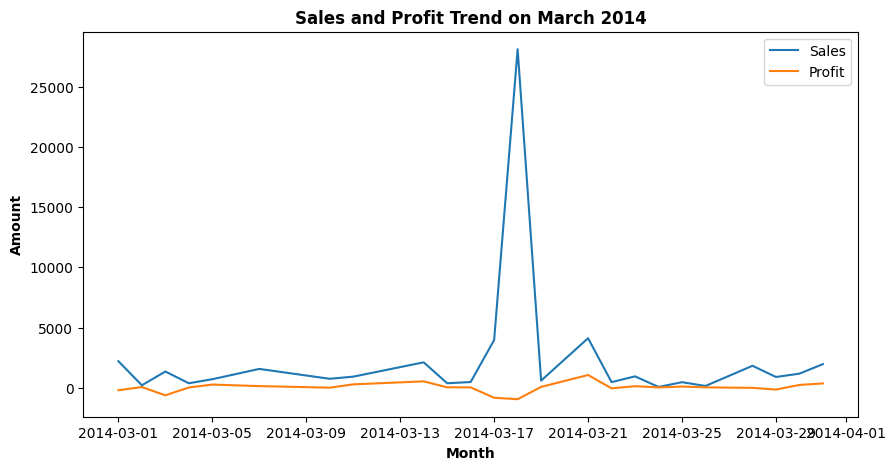

In [208]:
# Visualization

plt.figure(figsize=(10, 5))
plt.plot(grouped_march_2014['Order Date'], grouped_march_2014['Sales'], label='Sales')
plt.plot(grouped_march_2014['Order Date'], grouped_march_2014['Profit'], label='Profit')

plt.title('Sales and Profit Trend on March 2014', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.legend()
plt.show()

## 6. Analyze transactions in each Segment on 2014.

In [209]:
# Analysis 1

yearly_transactions = data_order_new.groupby([data_order_new['Order Date'].dt.year, 'Segment']).size().reset_index(name='Transactions')
yearly_transactions.columns = ['Year', 'Segment', 'Transactions']
data_2014 = yearly_transactions[yearly_transactions['Year'] == 2014]
data_2014

,Year,Segment,Transactions
0,2014,Consumer,1070
1,2014,Corporate,611
2,2014,Home Office,312


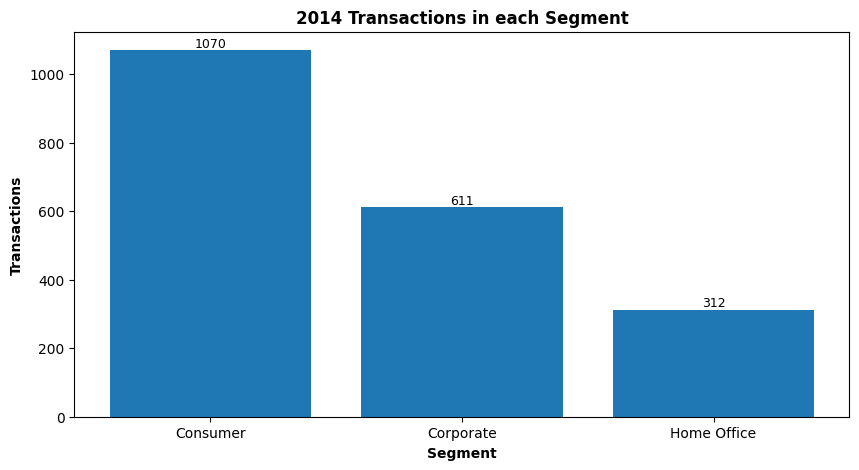

In [210]:
# Visualization 1

plt.figure(figsize=(10, 5))
plt.bar(data_2014['Segment'], data_2014['Transactions'])
total_count = data_2014['Transactions'].sum()

for idx, value in enumerate(data_2014['Transactions']):
    percent = (value / total_count) * 100
    plt.text(idx, value, f'{value}', ha='center', va='bottom', fontsize=9)

plt.title('2014 Transactions in each Segment', fontweight='bold')
plt.xlabel('Segment', fontweight='bold')
plt.ylabel('Transactions', fontweight='bold')
plt.show()

In [211]:
# Analysis 2

dataa2014 = data_order_new[data_order_new['Order Date'].dt.year == 2014].copy()
dataa2014.loc[:, 'Month'] = dataa2014['Order Date'].dt.month_name()
grouped_2014 = dataa2014.groupby(['Segment', 'Month']).size().reset_index(name='Transactions')

grouped_2014

,Segment,Month,Transactions
0,Consumer,April,48
1,Consumer,August,86
2,Consumer,December,149
3,Consumer,February,27
4,Consumer,January,49
5,Consumer,July,70
6,Consumer,June,96
7,Consumer,March,78
8,Consumer,May,71
9,Consumer,November,166


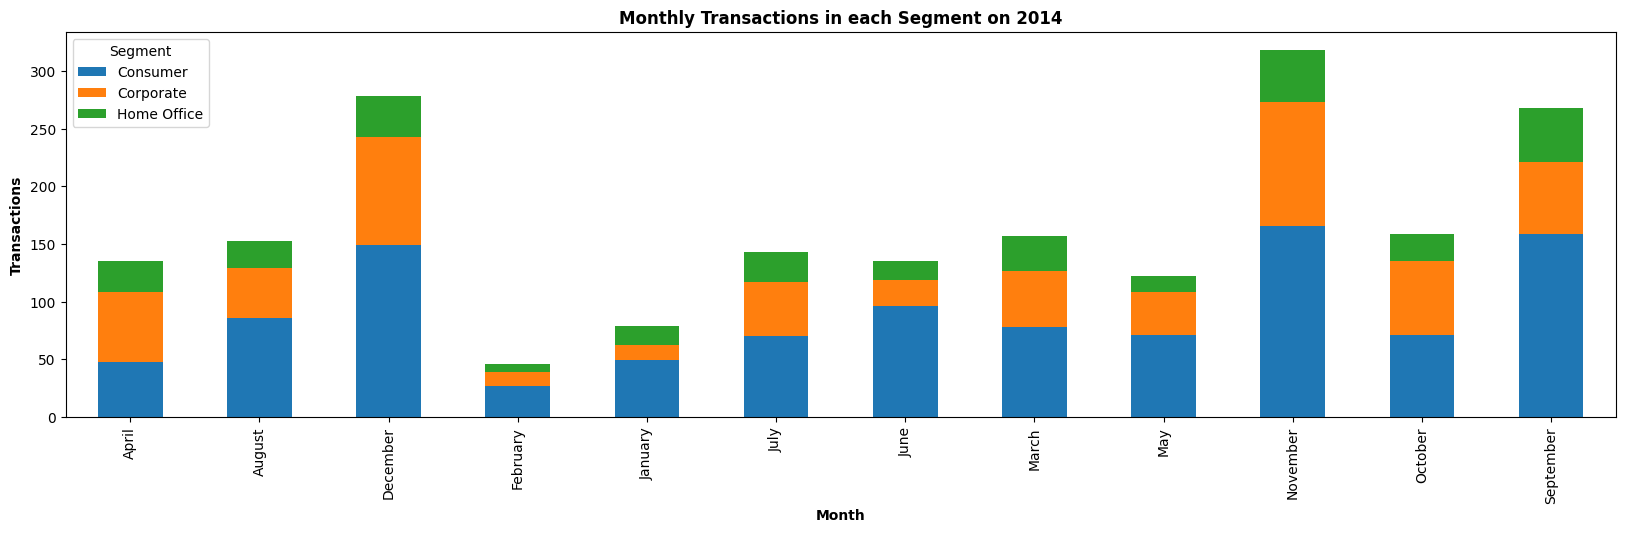

In [212]:
# Visualization 2

fig, ax = plt.subplots(figsize=(20, 5))

grafik_stack = pd.pivot_table(grouped_2014, index='Month', columns='Segment', values='Transactions', aggfunc='sum')
grafik_stack.plot(kind='bar', stacked=True, ax=ax)
plt.title('Monthly Transactions in each Segment on 2014', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Transactions', fontweight='bold')

plt.show()